In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
!unzip -qq "/content/drive/MyDrive/pill_data_13.zip"

In [ ]:
!unzip -qq "/content/drive/MyDrive/pill_data_46.zip"

In [ ]:
import os, shutil, pathlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
import shutil

file_path = "/content/sample_data/split_data"
if os.path.exists(file_path):
  shutil.rmtree(file_path)

### 전처리

* 선명도 조절

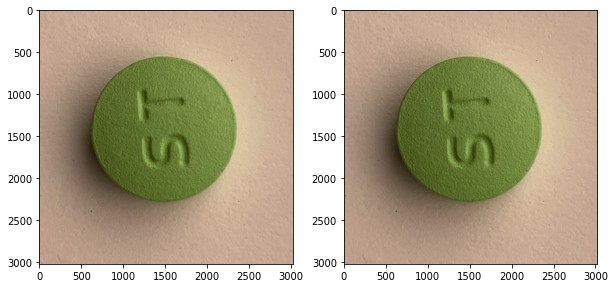

In [ ]:
image = cv2.imread('/content/sample_data/1/1_1.jpg')

# 커널 생성 (대상이 있는 픽셀을 강조)
kernel = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
# 커널 적용
image_sharp = cv2.filter2D(image, -1, kernel)


fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(image)

fig.add_subplot(1, 2, 2)
plt.imshow(image_sharp)

In [ ]:
import scipy as sp

image_sharp = cv2.imread('/content/sample_data/1/1_1.jpg')
image_sharp.shape

(3024, 3024, 3)

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(image_sharp[:15, :15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")

ValueError: ignored

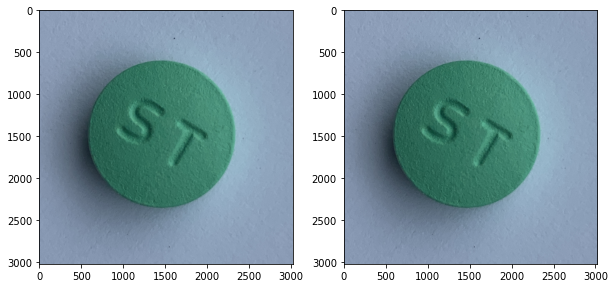

In [ ]:
############
image = cv2.imread('/content/sample_data/1/1_40.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 커널 생성 (대상이 있는 픽셀을 강조)
kernel = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
# 커널 적용
image_sharp = cv2.filter2D(image_rgb, -1, kernel)


fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(image_rgb)

fig.add_subplot(1, 2, 2)
plt.imshow(image_sharp)

* 폴더 생성

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/new_data')

for i in range(1,7):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/new_data/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

* 선명도

In [ ]:
for i in range(1,7):
  for j in range(1,1001):    
    image = cv2.imread(f'/content/sample_data/{i}/{i}_{j}.jpg', cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 커널 생성 (대상이 있는 픽셀을 강조)
    kernel = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
    # 커널 적용
    image_sharp = cv2.filter2D(image_rgb, -1, kernel)

    os.chdir(f"/content/sample_data/new_data/{i}")
    cv2.imwrite(f'{i}_{j}.jpg', image_sharp)

* 명암

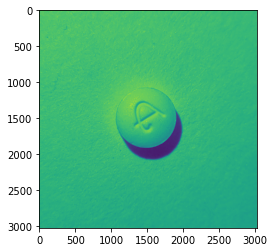

In [ ]:
src = cv2.imread('/content/sample_data/4/4_40.jpg', cv2.IMREAD_GRAYSCALE)

alpha1 = 0.000000000001 # 명암 조정값

dst1 = np.clip((1+alpha1) * src - 128 * alpha1, 0, 255).astype(np.uint8)

plt.imshow(dst1)

### split

* train

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/train')

for i in range(1,7):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/train/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,7):
    original_dir = pathlib.Path(f"/content/sample_data/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/train/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 201, end_index = 801)

* valid

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/valid')

for i in range(1,7):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/valid/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,7):
    original_dir = pathlib.Path(f"/content/sample_data/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/valid/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 1, end_index = 101)
make_subset(start_index = 801, end_index = 901)

* test

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/test')

for i in range(1,7):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/test/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,7):
    original_dir = pathlib.Path(f"/content/sample_data/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/test/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 101, end_index = 201)
make_subset(start_index = 901, end_index = 1001)

### 증강

* 각도

In [ ]:
for i in range(1, 7):
  for j in range(201, 801):
    img = cv2.imread(f'/content/sample_data/split_data/train/{i}/{i}_{j}.jpg', cv2.IMREAD_COLOR)

    img2 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전

    os.chdir(f'/content/sample_data/split_data/train/{i}')
    cv2.imwrite(f'180_{i}_{j}.jpg', img2)

* 선명도

In [ ]:
for i in range(1,7):
  for j in range(201,801):

    ### 선명도 향상
    image = cv2.imread(f'/content/sample_data/split_data/train/{i}/{i}_{j}.jpg', cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 커널 생성 (대상이 있는 픽셀을 강조)
    kernel = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
    # 커널 적용
    image_sharp = cv2.filter2D(image_rgb, -1, kernel)

    os.chdir(f"/content/sample_data/split_data/train/{i}")
    cv2.imwrite(f's_{i}_{j}.jpg', image_sharp)

* 선명도 + 각도

In [ ]:
for i in range(1,7):
  for j in range(201,801):
    image = cv2.imread(f'/content/sample_data/split_data/train/{i}/s_{i}_{j}.jpg', cv2.IMREAD_COLOR)
    image180 = cv2.rotate(image, cv2.ROTATE_180)

    os.chdir(f"/content/sample_data/split_data/train/{i}")
    cv2.imwrite(f'180_s_{i}_{j}.jpg', image180)


### 모델링

In [ ]:
train_dir = '/content/sample_data/split_data/train'
valid_dir = '/content/sample_data/split_data/valid'
test_dir  = '/content/sample_data/split_data/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (250, 250),
                  batch_size = 120,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (250, 250),
                  batch_size = 60,
                  class_mode = 'categorical')

Found 14400 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50V2

conv_base = ResNet50V2(weights = 'imagenet',
                  include_top = False,
                  input_shape = (250, 250, 3))

94668760/94668760 [==============================] - 5s 0us/step


In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(6, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 256)               33554688  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 57,121,030
Trainable params: 57,075,590
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000005),
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 30,
                       epochs = 20,
                       validation_data = valid_generator,
                       validation_steps = 20)

Epoch 1/20
30/30 [==============================] - 575s 19s/step - loss: 0.7810 - accuracy: 0.7747 - val_loss: 0.1353 - val_accuracy: 0.9575
Epoch 2/20
30/30 [==============================] - 560s 19s/step - loss: 0.0250 - accuracy: 0.9931 - val_loss: 0.0396 - val_accuracy: 0.9958
Epoch 3/20
30/30 [==============================] - 561s 19s/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0284 - val_accuracy: 0.9967
Epoch 4/20
30/30 [==============================] - 560s 19s/step - loss: 0.0091 - accuracy: 0.9981 - val_loss: 0.0192 - val_accuracy: 0.9983
Epoch 5/20
30/30 [==============================] - 562s 19s/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.0106 - val_accuracy: 0.9992
Epoch 6/20
30/30 [==============================] - 564s 19s/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9992
Epoch 7/20
30/30 [==============================] - 565s 19s/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 

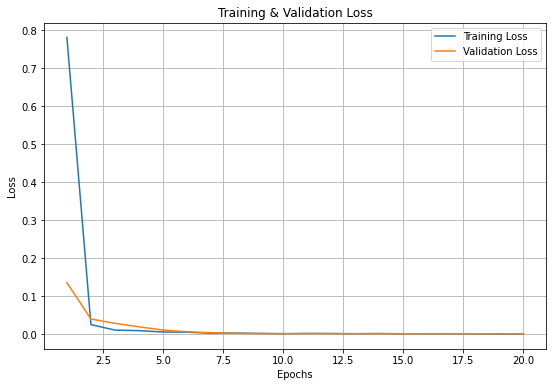

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

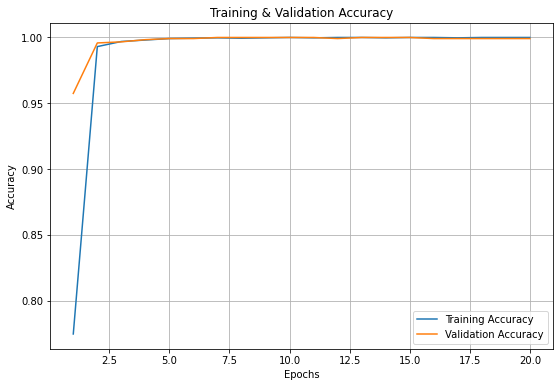

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (250, 250),
                 batch_size = 20,
                 class_mode = 'categorical')

Found 1200 images belonging to 6 classes.


In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 103s 2s/step - loss: 0.0018 - accuracy: 1.0000
Loss = 0.00179
Accuracy = 1.00000


In [ ]:
model.save('/content/drive/MyDrive/pill_model_resnet_1205.h5')